In [76]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head(50)



,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [3]:
#Count number of districts
name_unique = data_set_df["District name"].value_counts()
name_count = len(name_unique)
name_count

201

In [4]:
#List all columns
data_set_df.columns


Index(['District code', 'District name', 'Category', 'Student group',
       '2021-2022 student count - year to date',
       '2021-2022 attendance rate - year to date', '2020-2021 student count',
       '2020-2021 attendance rate', '2019-2020 student count',
       '2019-2020 attendance rate', 'Reporting period', 'Date update'],
      dtype='object')

In [5]:
#Check for incomplete rows
data_set_df.count()

District code                               2019
District name                               2019
Category                                    1818
Student group                               2019
2021-2022 student count - year to date      2019
2021-2022 attendance rate - year to date    2019
2020-2021 student count                     1963
2020-2021 attendance rate                   1963
2019-2020 student count                     1957
2019-2020 attendance rate                   1957
Reporting period                            2019
Date update                                 2019
dtype: int64

In [6]:
data_set_df.dtypes

District code                                object
District name                                object
Category                                     object
Student group                                object
2021-2022 student count - year to date        int64
2021-2022 attendance rate - year to date    float64
2020-2021 student count                     float64
2020-2021 attendance rate                   float64
2019-2020 student count                     float64
2019-2020 attendance rate                   float64
Reporting period                             object
Date update                                  object
dtype: object

# Free and Reduced Meals

In [71]:
#Filter by free and reduced meals
fr_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible") | (data_set_df["Student group"]=="All Students")]

fr_df.head()

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022
15,0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,0.9274,31.0,0.9414,37.0,0.9401,June 2022,07/22/2022
19,0020011,Ansonia School District,NaN,All Students,2139,0.9045,2153.0,0.8923,2185.0,0.9413,June 2022,07/22/2022


In [8]:
fr_df=fr_df[(fr_df["District name"]!="Union School District")&(fr_df["District name"]!="Sherman School District")&(fr_df["District name"]!="Hampton School District")&(fr_df["District name"]!="New Canaan School District")]
fr_df['District name'].value_counts()

District name
Connecticut                       2
Trumbull School District          2
Voluntown School District         2
Wallingford School District       2
Waterbury School District         2
                                 ..
Marlborough School District       2
Meriden School District           2
Middletown School District        2
Milford School District           2
The Woodstock Academy District    2
Name: count, Length: 197, dtype: int64

In [9]:
#Loop and pull out counts
#Make lists
all_students_counts=[]
fr_students_counts=[]

#Create loop to create lists for counts
for index, row in fr_df.iterrows():
    if row["Student group"]=="All Students":
        all_students_counts.append(row["2021-2022 student count - year to date"])
    if row["Student group"]=="Free/Reduced Price Meal Eligible":
        fr_students_counts.append(row["2021-2022 student count - year to date"])

#Make percents list to store percent free and reduced meals of each school
i=0
percents = []
#Loop to add to percents list
for item in fr_students_counts:
    percents.append(fr_students_counts[i]/all_students_counts[i])
    i=i+1
    


In [10]:
#Filter by Free/Reduced Meals
frl_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
frl_df = frl_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date","2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_frl_df = pd.merge(all_df, frl_df, on="District name", how="right")

#Check counts
merged_frl_df.dtypes



District name                                object
Student group_x                              object
2021-2022 student count - year to date_x      int64
2021-2022 attendance rate - year to date    float64
Student group_y                              object
2021-2022 student count - year to date_y      int64
dtype: object

In [11]:
merged_frl_df["Not FRL Count"] = (merged_frl_df["2021-2022 student count - year to date_x"]-merged_frl_df["2021-2022 student count - year to date_y"])
merged_frl_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396
1,Andover School District,All Students,161,0.9386,Free/Reduced Price Meal Eligible,30,131
2,Ansonia School District,All Students,2139,0.9045,Free/Reduced Price Meal Eligible,1417,722
3,Ashford School District,All Students,343,0.9309,Free/Reduced Price Meal Eligible,113,230
4,Avon School District,All Students,3057,0.9457,Free/Reduced Price Meal Eligible,286,2771


In [12]:
#Calculate FRM percents of total
merged_frl_df["Percentage Free/Reduced Meal"]=merged_frl_df["2021-2022 student count - year to date_y"]/merged_frl_df['2021-2022 student count - year to date_x']
#merged_frl_df["Percentage Free/Reduced Meal"] = merged_frl_df["Percentage Free/Reduced Meal"].map('{:0.2%}'.format)
#Calculate Not FRM percents of total
merged_frl_df["Percentage Not Free/Reduced Meal"]=merged_frl_df["Not FRL Count"]/merged_frl_df['2021-2022 student count - year to date_x']
#merged_frl_df["Percentage Not Free/Reduced Meal"] = merged_frl_df["Percentage Not Free/Reduced Meal"].map('{:0.2%}'.format)
merged_frl_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count,Percentage Free/Reduced Meal,Percentage Not Free/Reduced Meal
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396,0.397551,0.602449
1,Andover School District,All Students,161,0.9386,Free/Reduced Price Meal Eligible,30,131,0.186335,0.813665
2,Ansonia School District,All Students,2139,0.9045,Free/Reduced Price Meal Eligible,1417,722,0.662459,0.337541
3,Ashford School District,All Students,343,0.9309,Free/Reduced Price Meal Eligible,113,230,0.329446,0.670554
4,Avon School District,All Students,3057,0.9457,Free/Reduced Price Meal Eligible,286,2771,0.093556,0.906444


In [13]:
#Check Counts
merged_frl_df.dtypes

District name                                object
Student group_x                              object
2021-2022 student count - year to date_x      int64
2021-2022 attendance rate - year to date    float64
Student group_y                              object
2021-2022 student count - year to date_y      int64
Not FRL Count                                 int64
Percentage Free/Reduced Meal                float64
Percentage Not Free/Reduced Meal            float64
dtype: object

In [14]:
merged_con_df = merged_frl_df.loc[merged_frl_df["District name"]=="Connecticut"]
merged_con_df

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Not FRL Count,Percentage Free/Reduced Meal,Percentage Not Free/Reduced Meal
0,Connecticut,All Students,500285,0.9169,Free/Reduced Price Meal Eligible,198889,301396,0.397551,0.602449


-0.6440007109406707


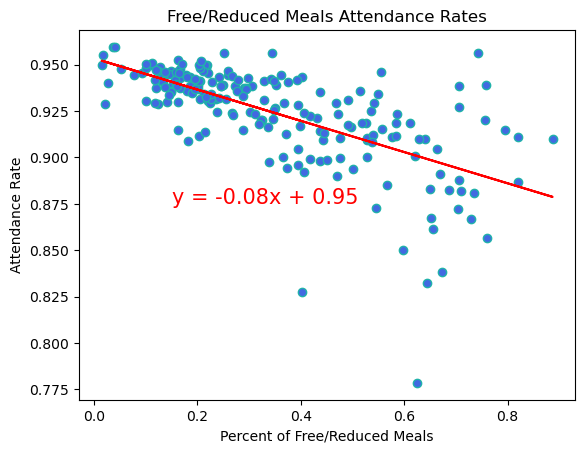

In [57]:
#Scatter plot for FR Meals
x_values = merged_frl_df["Percentage Free/Reduced Meal"]
y_values = merged_frl_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="lightseagreen", facecolors = "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Free/Reduced Meals')
plt.ylabel('Attendance Rate')
plt.title("Free/Reduced Meals Attendance Rates")
plt.annotate(line_eq,(0.15,0.875),fontsize=15, color = "red")
plt.savefig("Images/FRMAttenRate.png")
print(rvalue)
plt.show()

In [19]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.64


0.6440007109406707


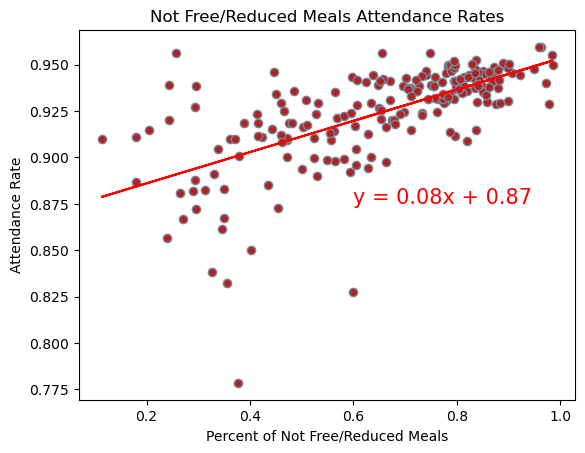

In [58]:
x_values = merged_frl_df["Percentage Not Free/Reduced Meal"]
y_values = merged_frl_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "lightslategray", facecolors = "firebrick")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Not Free/Reduced Meals')
plt.ylabel('Attendance Rate')
plt.title("Not Free/Reduced Meals Attendance Rates")
plt.annotate(line_eq,(0.6,0.875),fontsize=15, color = "red")
plt.savefig("Images/NotFRMAttenRate.png")
print(rvalue)
plt.show()

# English Learners

In [73]:
#Filter by English learners
ell_df = data_set_df.loc[(data_set_df["Student group"]=="English Learners")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
ell_df = ell_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", 
                 "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_ell_df = pd.merge(all_df, ell_df, on="District name", how="right")

#Check counts
merged_ell_df.head()



,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,0.9169,English Learners,43571
1,Ansonia School District,All Students,2139,0.9045,English Learners,122
2,Avon School District,All Students,3057,0.9457,English Learners,76
3,Berlin School District,All Students,2613,0.9341,English Learners,95
4,Bethel School District,All Students,3102,0.9375,English Learners,167


In [75]:
#Calculate ELL percents of total
merged_ell_df["Percentage ELL"]=merged_ell_df["2021-2022 student count - year to date_y"]\
/merged_ell_df['2021-2022 student count - year to date_x']

#Check Count
merged_ell_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage ELL
0,Connecticut,All Students,500285,0.9169,English Learners,43571,0.087092
1,Ansonia School District,All Students,2139,0.9045,English Learners,122,0.057036
2,Avon School District,All Students,3057,0.9457,English Learners,76,0.024861
3,Berlin School District,All Students,2613,0.9341,English Learners,95,0.036357
4,Bethel School District,All Students,3102,0.9375,English Learners,167,0.053836


-0.5324713816396521


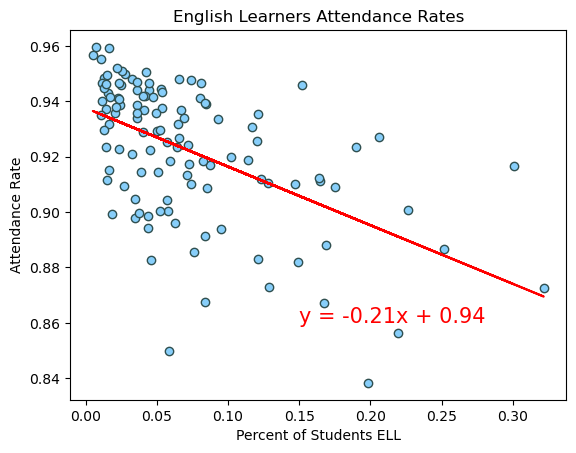

In [30]:
#Plot ELL Attendance Rates
x_values = merged_ell_df["Percentage ELL"]
y_values = merged_ell_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="lightskyblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Students ELL')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
plt.title("English Learners Attendance Rates")
print(rvalue)

#Save Figure
plt.savefig("Images/ScatterELL.png")


plt.show()

In [31]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.53


# Students with Disabilities

In [32]:
#Filter by Student with Disabilites
dis_df = data_set_df.loc[(data_set_df["Student group"]=="Students With Disabilities")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
dis_df = dis_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_dis_df = pd.merge(all_df, dis_df, on="District name", how="right")

#Check counts
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
dtype: int64

In [33]:
#Calculate Disabilites percents of total
merged_dis_df["Percentage Disabilities"]=merged_dis_df["2021-2022 student count - year to date_y"]/merged_dis_df['2021-2022 student count - year to date_x']
#Check Count
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
Percentage Disabilities                     190
dtype: int64

-0.46677539240579297


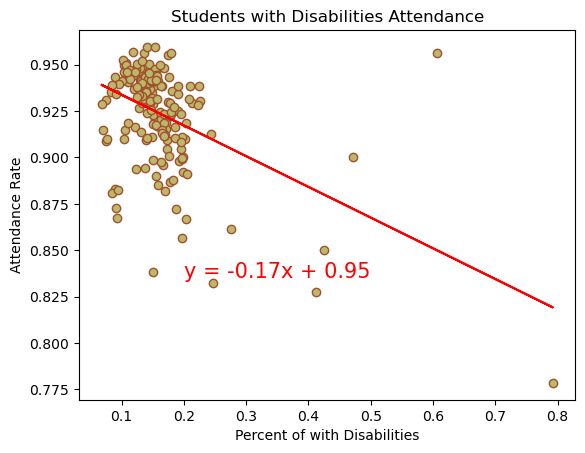

In [34]:
x_values = merged_dis_df["Percentage Disabilities"]
y_values = merged_dis_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="sienna", facecolors="darkkhaki")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with Disabilities')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.2,0.835),fontsize=15, color = "red")
plt.title("Students with Disabilities Attendance")
print(rvalue)

plt.savefig("Images/ScatterDis.png")

plt.show()

In [35]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Student with High Needs

In [36]:
#Filter by Student with High Needs
needs_df = data_set_df.loc[(data_set_df["Student group"]=="Students With High Needs")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
needs_df = needs_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_needs_df = pd.merge(all_df, needs_df, on="District name", how="right")

#Check counts
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
dtype: int64

In [37]:
#Calculate High Needs percents of total
merged_needs_df["Percentage High Needs"]=merged_needs_df["2021-2022 student count - year to date_y"]/merged_needs_df['2021-2022 student count - year to date_x']
#Check Count
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
Percentage High Needs                       197
dtype: int64

-0.719825743438532


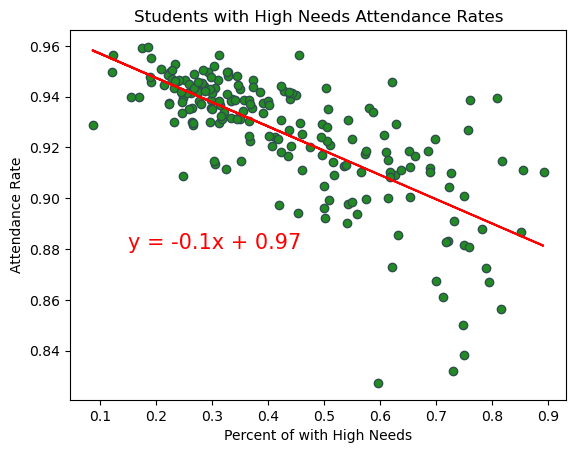

In [38]:
#High Needs Scatter Plot
x_values = merged_needs_df["Percentage High Needs"]
y_values = merged_needs_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="forestgreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with High Needs')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.88),fontsize=15, color = "red")
plt.title("Students with High Needs Attendance Rates")
print(rvalue)
plt.savefig("Images/Scatter.png")
plt.show()

In [39]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.72


# Students Race = Black or African American

In [40]:
#Filter by Student Race = Black of African American
black_df = data_set_df.loc[(data_set_df["Student group"]=="Black or African American")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
black_df = black_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_black_df = pd.merge(all_df, black_df, on="District name", how="right")

#Check counts
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
dtype: int64

In [41]:
#Calculate Black/African American percents of total
merged_black_df["Percentage Black or African American"]=merged_black_df["2021-2022 student count - year to date_y"]/merged_black_df['2021-2022 student count - year to date_x']
#Check Count
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
Percentage Black or African American        128
dtype: int64

-0.4734319890187277


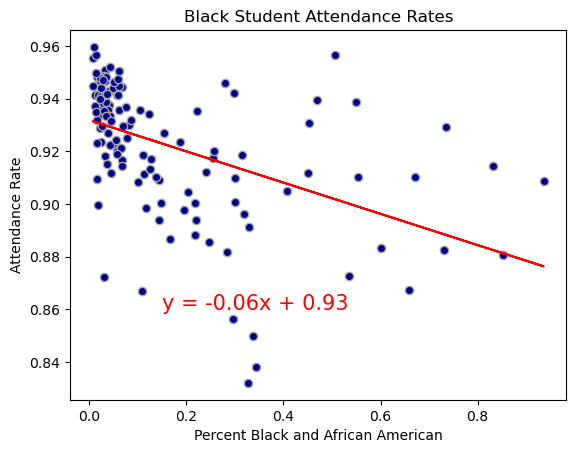

In [42]:
#Balck Attendance Rates
x_values = merged_black_df["Percentage Black or African American"]
y_values = merged_black_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkgray", facecolors="darkblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Black and African American')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
plt.title("Black Student Attendance Rates")
print(rvalue)
plt.savefig("Images/ScatterBlack.png")
plt.show()

In [43]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Students Race = Hispanic/Latino of any race

In [44]:
#Filter by Student Race = Hispanic/Latino of any race
his_df = data_set_df.loc[(data_set_df["Student group"]=="Hispanic/Latino of any race")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
his_df = his_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_his_df = pd.merge(all_df, his_df, on="District name", how="right")

#Check counts
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
dtype: int64

In [45]:
#Calculate Hispanic/Latino of any race percents of total
merged_his_df["Percentage Hispanic/Latino of any race"]=merged_his_df["2021-2022 student count - year to date_y"]/merged_his_df['2021-2022 student count - year to date_x']
#Check Count
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
Percentage Hispanic/Latino of any race      168
dtype: int64

-0.5042716980200688


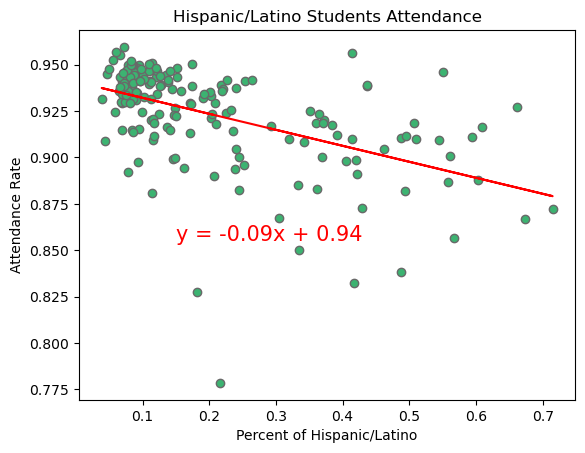

In [46]:
#Hispanic Attendance Graph
x_values = merged_his_df["Percentage Hispanic/Latino of any race"]
y_values = merged_his_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="dimgrey", facecolors="mediumseagreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Hispanic/Latino')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.855),fontsize=15, color = "red")
plt.title("Hispanic/Latino Students Attendance")
print(rvalue)
plt.savefig("Images/ScatterHisp.png")

plt.show()

In [47]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.5


# Students Race = White

In [48]:
#Filter by Student Race = White
white_df = data_set_df.loc[(data_set_df["Student group"]=="White")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
white_df = white_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_white_df = pd.merge(all_df, white_df, on="District name", how="right")

#Check counts
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
dtype: int64

In [49]:
#Calculate Hispanic/Latino of any race percents of total
merged_white_df["Percentage White"]=merged_white_df["2021-2022 student count - year to date_y"]/merged_white_df['2021-2022 student count - year to date_x']

#Check Count
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
Percentage White                            182
dtype: int64

0.5127319750155351


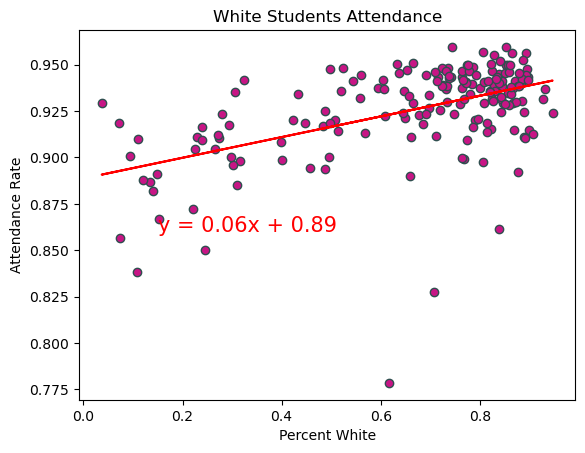

In [50]:
#White Students Attendance Graph
x_values = merged_white_df["Percentage White"]
y_values = merged_white_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="mediumvioletred")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent White')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
plt.title("White Students Attendance")
print(rvalue)
plt.savefig("Images/ScatterWhite.png")
plt.show()

In [51]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.51


# Students All Other Races

In [52]:
#Filter by Student Race = All Other
other_df = data_set_df.loc[(data_set_df["Student group"]=="All other races")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
other_df = other_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_other_df = pd.merge(all_df, other_df, on="District name", how="right")

#Check counts
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
dtype: int64

In [53]:
#Calculate Hispanic/Latino of any race percents of total
merged_other_df["Percentage Other Races"]=merged_other_df["2021-2022 student count - year to date_y"]/merged_other_df['2021-2022 student count - year to date_x']

#Check Count
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
Percentage Other Races                      121
dtype: int64

0.22706892629570416


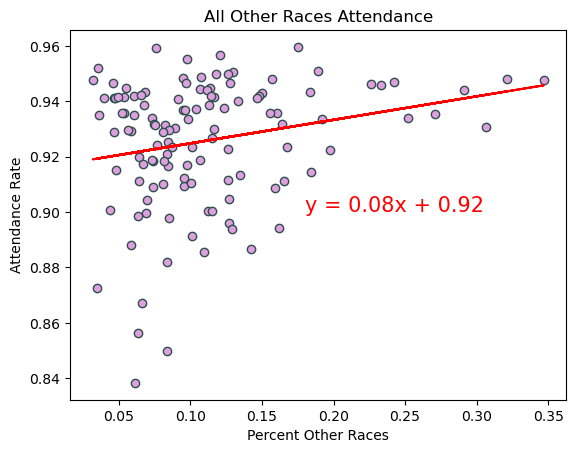

In [54]:
#All Other Races Attendance Graphs
x_values = merged_other_df["Percentage Other Races"]
y_values = merged_other_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="plum")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Other Races')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.18,0.9),fontsize=15, color = "red")
plt.title("All Other Races Attendance")
print(rvalue)
plt.savefig("Images/ScatterOtherRace.png")
plt.show()

In [55]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23


In [69]:
# Total number of students compared to attendance rate
total_df = data_set_df.loc[data_set_df["Student group"]=="All Students"]
total_df = total_df[["District name", "Student group","2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]
total_df = total_df.drop(0)
total_df

,District name,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date
13,Andover School District,All Students,161,0.9386
19,Ansonia School District,All Students,2139,0.9045
31,Ashford School District,All Students,343,0.9309
40,Avon School District,All Students,3057,0.9457
52,Barkhamsted School District,All Students,199,0.9305
...,...,...,...,...
1972,Unified School District #2,All Students,78,0.9202
1977,Connecticut Technical Education and Career System,All Students,11138,0.8985
1990,Norwich Free Academy District,All Students,2068,0.8940
2002,The Gilbert School District,All Students,421,0.8901


-0.22328004076937047


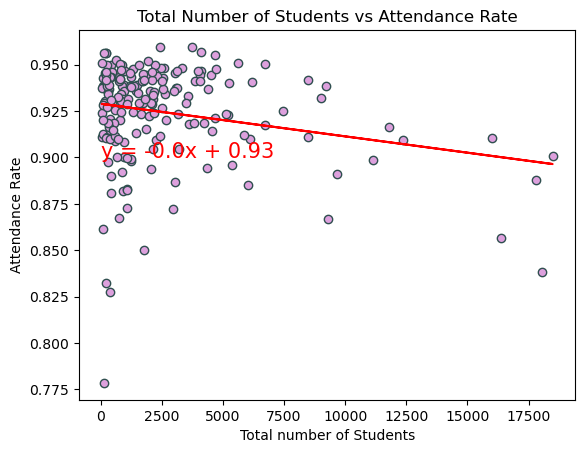

In [70]:
#Scatter plot of count to attendance rate
#All Other Races Attendance Graphs
x_values = total_df["2021-2022 student count - year to date"]
y_values = total_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="plum")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Total number of Students')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.18,0.9),fontsize=15, color = "red")
plt.title("Total Number of Students vs Attendance Rate")
print(rvalue)
plt.savefig("Images/ScatterAttendanceTotal.png")
plt.show()